<a href="https://colab.research.google.com/github/Vildend/tf-data-analysis-project2/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B2%20%D0%B8%D0%BD%D0%B4%D1%83%D1%81%D1%82%D1%80%D0%B8%D0%B8.%20%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%202.%20%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

from scipy.stats import norm

------------------

### 0. Запросить у бота в Телеграме условие командой `/get_project1_desc`.

В этом задании вам предстоит провести A/B тест на процессе продажных обзвонов.

**Контекст**

Мы считаем, что наш продукт достаточно дорогой для клиента.
У нас есть гипотеза, что уменьшение цены продукта
позволит повысить частоту продаж
и суммарно увеличит доходность продукта.
        

**Тест**

Мы проводим тест,
в рамках которого контролем является
продажа продукта со старой ценой,
а тестом - продажа продукта с новой ценой.
Целью этого теста
является проверка гипотезы роста доходности
нашего продукта из-за уменьшения тарифа.


**Статистические вводные**

Уровень значимости 5%.
Мы хотели бы различать 5%-ное
изменение целевой метрики
с вероятностью 80%.

**Нулевая гипотеза**: доходность продукта из-за уменьшения тарифа остается на том же уровне

**Альтернативная гипотеза**: доходность продукта из-за уменьшения тарифа выросла

In [ ]:
df = pd.read_csv('hist_telesales.csv')
df.head()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,1,0,90,0,-90
1,1,0,0,5,0,-5
2,2,0,0,68,0,-68
3,3,1,0,22,0,-22
4,4,1,0,22,0,-22


In [ ]:
fig = px.histogram(df['NPV'])
fig.show()

### 1. Необходимо выбрать метрику и привести аргументацию.

Так как целью этого теста является проверка гипотезы роста доходности
нашего продукта из-за уменьшения тарифа, то мы выбираем **NPV** в качестве целевой метрики (учитывет все расходы и заработок).

### 2. Альтернатива в критерии.

Нам требуется проверить, что уменьшение цены продукта позволит повысить частоту продаж и суммарно увеличит доходность продукта. Следовательно мы будем рассматривать правостороннюю альтернативу.

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Для начала найдем изменение нашей метрики (MDE).
Мы хотели бы различать 5%-ное изменение целевой метрики, следовательно, найдем **MDE**:

In [ ]:
# MDE = значение метрики на контроле * желаемое изменение метрики
MDE = round(df['NPV'].mean() * 0.05)
MDE

14

Теперь с помощью формулы ниже найдем размер выборки.

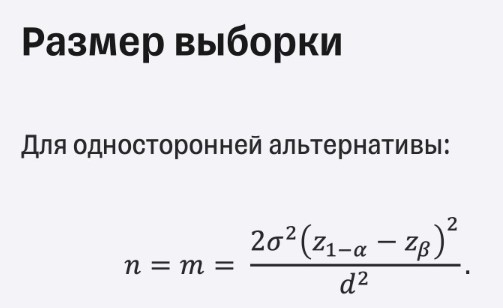

In [ ]:
variance = df['NPV'].var()
alpha1 = 0.05
betta1 = 0.2

In [ ]:
sample_size1 = ( 2 * variance * (norm.ppf(1 - alpha1) - norm.ppf(betta1)) ** 2 ) / (MDE ** 2)
np.ceil(sample_size1)

28972.0

### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
# Код выборки
39755

39755

In [ ]:
df_control = pd.read_csv('Контроль.csv')
df_test    = pd.read_csv('Тест.csv')

df_control.head()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,0,0,46,0,-46
1,1,1,0,113,0,-113
2,2,0,0,31,0,-31
3,3,1,1,1806,1205,-601
4,4,1,0,36,0,-36


In [ ]:
fig = px.histogram(df_control['NPV'])
fig.show()

### 4. Принятие решения. Расписать подробно с аргументами.

Мы имеем дело с небинарным распределением и далее воспользуемся критерием ttest_ind и получим pvalue.

In [ ]:
from scipy.stats import ttest_ind

ttest_pvalue = ttest_ind(df_control['NPV'], df_test['NPV'], equal_var = False, alternative = 'greater').pvalue
ttest_pvalue < alpha1

False

Получаем, что pvalue **не меньше**, чем alpha, следовательно мы не можем отклонить нулевую гипотезу. Делаем вывод, что продажа продукта с новой ценой не имеет статистически значимых обоснований для дальнейшего тестирования.